In [1]:
import pygplates
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

from slab_tracker_utils import *

%matplotlib inline

#######################################################
# Define Input files for Muller 2016 AREPS model
#######################################################

'''
MODELDIR = '/Users/Simon/GIT/gplates-web/django/GWS/DATA/MODELS/MULLER2016/'
RotFile_List = ['%s/Global_EarthByte_230-0Ma_GK07_AREPS.rot' % MODELDIR]
GPML_List = ['%s/Global_EarthByte_230-0Ma_GK07_AREPS_PlateBoundaries.gpmlz' % MODELDIR,\
             '%s/Global_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpmlz' % MODELDIR]
'''
'''
MODELDIR = '/Users/Simon/GIT/gplates-web/django/GWS/DATA/MODELS/SETON2012/'
RotFile_List = ['%s/Seton_etal_ESR2012_2012.1.rot' % MODELDIR]
GPML_List = ['%s/Seton_etal_ESR2012_PP_2012.1.gpmlz' % MODELDIR]
'''
#'''
MODELDIR = '/Applications/GPlates-2.0.0/SampleData/FeatureCollections/'
RotFile_List = ['%s/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot' % MODELDIR]
GPML_List = ['%s/DynamicPolygons/Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz' % MODELDIR,\
             '%s/DynamicPolygons/Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz' % MODELDIR,\
             '%s/DynamicPolygons/Matthews_etal_GPC_2016_TopologyBuildingBlocks.gpmlz' % MODELDIR]
#'''

# specify the convention for agegrids
# assumes that the file name has 1 number within it that specifies the age in Myr
# the list object below must contain 2 strings, which specify the bit before and after this number
agegrid_filename = ['/Users/Simon/Data/AgeGrids/Agegrids_30m_20151002_2015_v1_r756/agegrid_30m_','.grd']

# If you do not have age grids, use the next line instead:
#agegrid_filename = None

#####################################
rotation_model = pygplates.RotationModel(RotFile_List)
topology_features = pygplates.FeatureCollection()
for file in GPML_List:
    topology_feature = pygplates.FeatureCollection(file)
    topology_features.add(topology_feature)
#'''



### Explanation
An example of how to define parameters.

Suppose you want to look at the material subducted between 20 Ma and 10 Ma, then you would specify the start_time as 20 and the end_time as 10. 

This will produce a plot which is a snapshot at 10 Ma (the end_time), with a series of lines that show subducted slabs traced from surface trench positions between 20 and 10 Ma (and with a spacing determined by 'time_step', and with a colour indicating the depth. 

Lines are drawn between sets of points which were subducted along the same trench at the same time - note that, ven though they look like contours, they are not actually contours in terms of having the same depth, or the same age of the subducting lithosphere, rather they are 'iso-subduction-time-chrons'

The depth and position of each point is a function of the slab dip.


[ the parameter 'warped_time_interval' is not actually used in this implementation ]



Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 15.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 15.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 15.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07 for IZA part 2" at 15.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity prop

time 15.00 Ma
time 14.00 Ma


    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 14.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 14.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"


time 13.00 Ma


    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 13.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 13.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "" at 13.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "South America trench taken from COB file" at 13.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "South America trench taken from 


time 12.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Sandwich Trench" at 13.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 12.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 12.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 12.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07 f


time 11.00 Ma


    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 11.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan sub zone fromEarthByte cob MG 4-20-07" at 11.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 11.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Japan 


time 10.00 Ma


    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 10.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 10.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"


time 9.00 Ma


    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 9.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 9.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"


time 8.00 Ma


    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "NAM subduction COB" at 9.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "SanCristobalTrench DiCaprio" at 8.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 8.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 8.


time 7.00 Ma


    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "NAM subduction COB" at 8.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 7.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 7.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"


time 6.00 Ma


    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "NAM subduction COB" at 7.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 6.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 6.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"


time 5.00 Ma


    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "NAM subduction COB" at 6.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 5.0Ma
    there are 


time 4.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "NewBritian TR-MG-5-22-07" at 5.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 4.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking


time 3.00 Ma


    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Mussau Trench" at 3.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Mussau Trench" at 3.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Mussau Trench" at 3.0Ma
    there are not exactly 2 topologies sharing the sub-s


time 2.00 Ma


    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 2.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 2.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Izu Bonin Trench" at 2.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 2.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Marianas Trench-NUVEL" at 2.0Ma
    the


time 1.00 Ma


    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 1.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 1.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Izu Bonin Trench" at 1.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Kamchatka SZ from EarthByte COB at 0Ma -- MG 4/20/07" at 1.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Marianas


time 0.00 Ma


    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "NAM subduction COB" at 1.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding plate of the subducting shared sub-segment "So Melanesian-MG-5-20-07"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "So Melanesian-MG-5-20-07"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Aleutian and Bering Sea Masking Polygon" at 0.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Hikurangi& Kermadec TR" at 0.0Ma
    


    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "Sandwich Trench" at 0.0Ma
    there are not exactly 2 topologies sharing the sub-segment.
Unable to find the overriding plate of the subducting shared sub-segment "So Melanesian-MG-5-20-07"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "So Melanesian-MG-5-20-07"
    subduction zone feature is missing subduction polarity property or it is set t

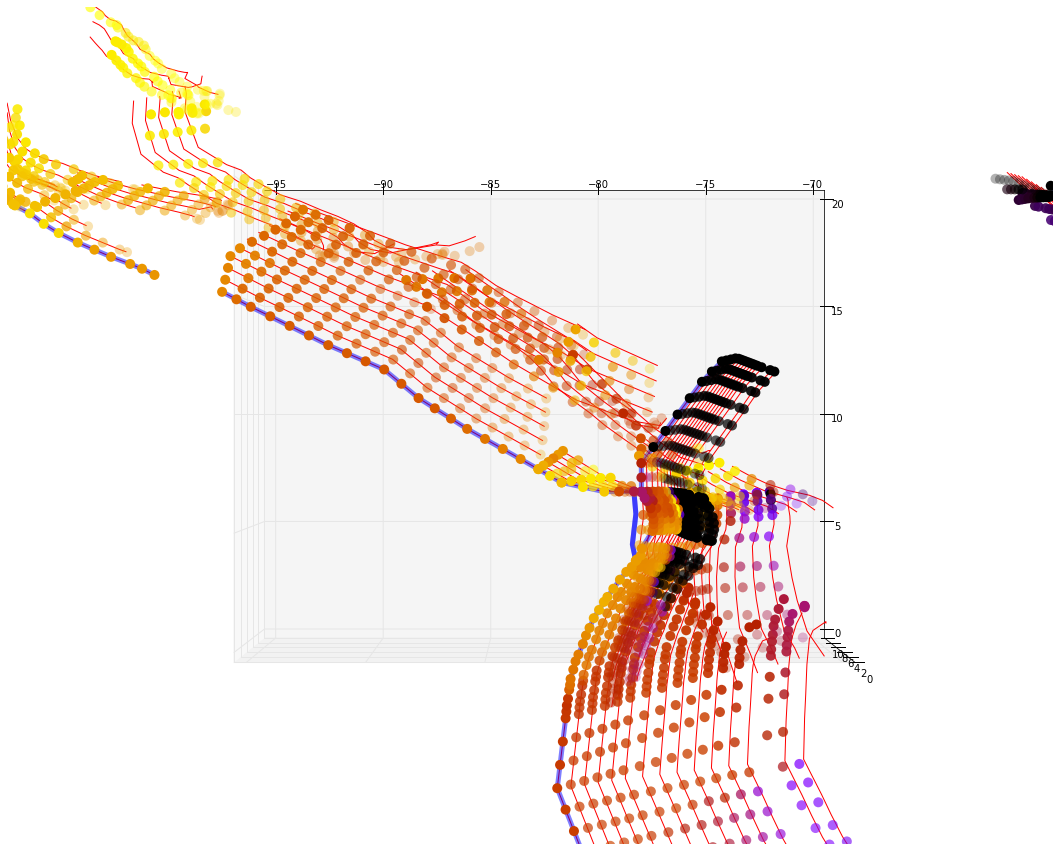

In [2]:
#############################
# INPUT PARAMETERS
# 
start_time = 15.
end_time = 0.
time_step = 1.0
dip_angle_degrees = 45.0
line_tessellation_distance = np.radians(1.0)
# Try to use small circle path for stage rotation to rotate along velocity dip.
# Ie, distance to stage rotation pole matches distance to original stage pole.
#use_small_circle_path = False

output_filename = 'subduction_3d_geometries_time%0.2fMa_dip%0.2f.asc' % (end_time,dip_angle_radians)


#############################

# create empty list to put all the features in
#point_features = []

fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(111, projection='3d')


# array into which results will be stored
output_data = []

dip_angle_radians = np.radians(dip_angle_degrees)

# loop over a series of times at which we want to extract trench iso-sub-chrons
for time in np.arange(start_time,end_time-time_step,-time_step):
    
    print 'time %0.2f Ma' % time

    # call function to get subduction boundary segments
    subduction_boundary_sections = getSubductionBoundarySections(topology_features,
                                                     rotation_model,
                                                     time)
    
    # Set up an age grid interpolator for this time, to be used
    # for each tessellated line segment
    if agegrid_filename is not None:
        grdfile = '%s%d%s' % (agegrid_filename[0],time,agegrid_filename[1])
        lut = make_age_interpolator(grdfile)
    
    # Loop over each segment
    for segment_index,subduction_segment in enumerate(subduction_boundary_sections):
    
        # find the overrding plate id (and only continue if we find it)
        overriding_and_subducting_plates = find_overriding_and_subducting_plates(subduction_segment,time)
        
        #subduction_dip = subduction_segment.get_feature().get_double(pygplates.PropertyName.create_gpml('subductionZoneDeepDip'))
        
        if not overriding_and_subducting_plates:
            continue
        overriding_plate, subducting_plate, subduction_polarity = overriding_and_subducting_plates

        overriding_plate_id = overriding_plate.get_resolved_feature().get_reconstruction_plate_id()
        subducting_plate_id = subducting_plate.get_resolved_feature().get_reconstruction_plate_id()
        
        #if (opid!=224 or cpid!=909):
        #if (subducting_plate_id!=911 and subducting_plate_id!=909):
        #if subducting_plate_id<900:
        #    continue
        
        tessellated_line = subduction_segment.get_resolved_geometry().to_tessellated(line_tessellation_distance)

        #print len(tessellated_line.get_points())
        
        if agegrid_filename is not None:
            x = tessellated_line.to_lat_lon_array()[:,1]
            y = tessellated_line.to_lat_lon_array()[:,0]
            subduction_ages = lut.ev(np.radians(y+90.),np.radians(x+180.))
        else:
            # if no age grids, just fill the ages with zero
            subduction_ages = [0. for point in tessellated_line.to_lat_lon_array()[:,1]]
              
        # CALL THE MAIN WARPING FUNCTION
        (points, 
         point_depths, 
         polyline) = warp_subduction_segment(tessellated_line,
                                             rotation_model,
                                             subducting_plate_id,
                                             subduction_polarity,
                                             time,
                                             end_time,
                                             time_step,
                                             dip_angle_radians)
        
 
        # add points for this segment to the plot
        ax.scatter(polyline.to_lat_lon_array()[:,1],
                   polyline.to_lat_lon_array()[:,0],
                   np.array(point_depths)/100,
                   c=np.array(subduction_ages),s=100,
                   edgecolors='',vmin=0,vmax=80,zorder=2,cmap=plt.cm.gnuplot_r)
        ax.plot(polyline.to_lat_lon_array()[:,1],polyline.to_lat_lon_array()[:,0],
                 '-r',markersize=12,zorder=1)
        
        output_data.append([time,polyline,point_depths,subduction_ages])


# write out the features
#output_features = pygplates.FeatureCollection(point_features)

#output_features.write('SlabWindowPoints.gpmlz')
for szg in subduction_boundary_sections:
        tmpp = szg.get_resolved_geometry().to_lat_lon_array()
        ax.plot(tmpp[:,1],tmpp[:,0],'b',linewidth=5,alpha=0.5)

#ax.colorbar()

# Central America
#ax.set_xlim(-110,-60)
#ax.set_ylim(-10,35)
#plt.xlim(-95,-78)
#plt.ylim(6,20)
plt.xlim(-95,-70)
plt.ylim(0,20)

# Patagonia
#plt.xlim(-90,-30)
#plt.ylim(-65,-30)
#plt.xlim(-40,-30)
#plt.ylim(-62,-50)

# Peru
#plt.xlim(-90,-30)
#plt.ylim(-25,10)

# Japan
#plt.xlim(115,150)
#plt.ylim(15,60)

ax.set_zlim(10,0)
ax.set_aspect('equal')

ax.view_init(90, -90)

#fig.show()


### write results to file
write_subducted_slabs_to_xyz(output_filename,output_data)



In [33]:
output_filename = 'test.asc'  

with open(output_filename, 'w') as output_file:
    output_file.write('Long,Lat,Depth,AgeAtSubduction,TimeOfSubduction\n')
    for ds in data_store:
        output_data = np.vstack((np.ones((1,len(ds[2])))*ds[0],
                                 ds[1].to_lat_lon_array()[:,1],
                                 ds[1].to_lat_lon_array()[:,0],
                                 ds[2],
                                 ds[3]))
        for index in range(len(ds[2])):
            output_file.write('%0.6f,%0.6f,%0.6f,%0.2f,%0.2f\n' % (ds[1].to_lat_lon_array()[index,1],
                                                                   ds[1].to_lat_lon_array()[index,0],
                                                                   ds[2][index],
                                                                   ds[3][index],
                                                                   ds[0]))
            
            

In [30]:
range(len(ds[2]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]